In [3]:
# =========================================
# Multi-p CPD training & evaluation script
# =========================================
import os, re, random, math
import numpy as np
import pandas as pd
import torch, torch.nn as nn, torch.nn.functional as F, torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import trange
import os, time, json, shutil

In [4]:
print(os.listdir("/kaggle/input/cl31-3lakh-per-p-type2-nn-dataset/out_tpye_two_31"))

['bsc_p0.045_C1_n31_k11.csv', 'bsc_p0.025_C2_n31_k6.csv', 'bsc_p0.05_C1_n31_k11.csv', 'bsc_p0.03_C1_n31_k11.csv', 'bsc_p0.005_C2_n31_k6.csv', 'bsc_p0.07_C2_n31_k6.csv', 'bsc_p0.065_C1_n31_k11.csv', 'bsc_p0.02_C1_n31_k11.csv', 'bsc_p0.001_C2_n31_k6.csv', 'bsc_p0.095_C1_n31_k11.csv', 'bsc_p0.01_C2_n31_k6.csv', 'bsc_p0.04_C2_n31_k6.csv', 'bsc_p0.015_C2_n31_k6.csv', 'bsc_p0.055_C1_n31_k11.csv', 'bsc_p0.025_C1_n31_k11.csv', 'bsc_p0.085_C1_n31_k11.csv', 'bsc_p0.04_C1_n31_k11.csv', 'bsc_p0.035_C2_n31_k6.csv', 'bsc_p0.085_C2_n31_k6.csv', 'bsc_p0.06_C1_n31_k11.csv', 'bsc_p0.06_C2_n31_k6.csv', 'bsc_p0.001_C1_n31_k11.csv', 'bsc_p0.045_C2_n31_k6.csv', 'bsc_p0.065_C2_n31_k6.csv', 'bsc_p0.1_C1_n31_k11.csv', 'bsc_p0.015_C1_n31_k11.csv', 'bsc_p0.005_C1_n31_k11.csv', 'bsc_p0.035_C1_n31_k11.csv', 'bsc_p0.03_C2_n31_k6.csv', 'bsc_p0.09_C1_n31_k11.csv', 'bsc_p0.075_C2_n31_k6.csv', 'bsc_p0.05_C2_n31_k6.csv', 'bsc_p0.08_C2_n31_k6.csv', 'bsc_p0.02_C2_n31_k6.csv', 'bsc_p0.075_C1_n31_k11.csv', 'bsc_p0.095_C2_n3

Held-out p values (UNSEEN in training): [0.05, 0.095]
Seen p values (used for training):     [0.001, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.09, 0.1]
Unique p values found: [0.05, 0.095, 0.085, 0.07, 0.001, 0.09, 0.055, 0.01, 0.015, 0.045, 0.025, 0.035, 0.02, 0.1, 0.03, 0.075, 0.08, 0.04, 0.005, 0.065, 0.06]
Total unique p values: 21
Training samples: 240000
Validation samples: 24000
Test (seen-p) samples: 24000
Test (unseen-p) samples: 24000


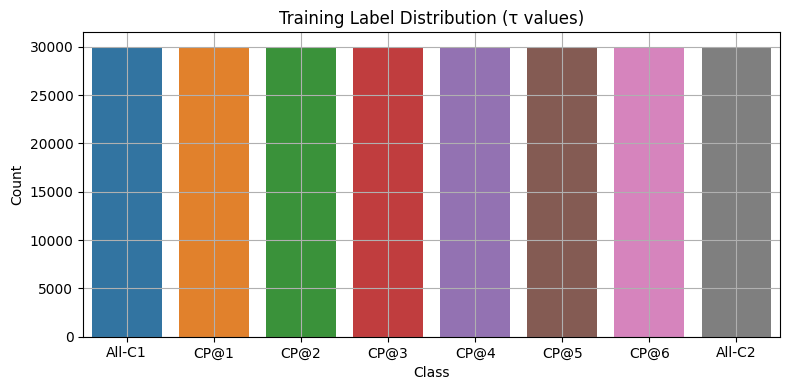

Training:   2%|▏         | 1/50 [00:20<16:32, 20.25s/it]

Epoch 01 | TrainLoss 2.0818 | ValAcc 0.1267


Training:   4%|▍         | 2/50 [00:40<16:15, 20.32s/it]

Epoch 02 | TrainLoss 2.0789 | ValAcc 0.1401


Training:   6%|▌         | 3/50 [01:01<15:58, 20.39s/it]

Epoch 03 | TrainLoss 1.7770 | ValAcc 0.4186


Training:   8%|▊         | 4/50 [01:21<15:38, 20.40s/it]

Epoch 04 | TrainLoss 1.3563 | ValAcc 0.5618


Training:  10%|█         | 5/50 [01:41<15:18, 20.41s/it]

Epoch 05 | TrainLoss 1.1071 | ValAcc 0.6767


Training:  12%|█▏        | 6/50 [02:02<14:53, 20.31s/it]

Epoch 06 | TrainLoss 0.9271 | ValAcc 0.7468


Training:  14%|█▍        | 7/50 [02:22<14:32, 20.28s/it]

Epoch 07 | TrainLoss 0.8014 | ValAcc 0.7876


Training:  16%|█▌        | 8/50 [02:42<14:12, 20.31s/it]

Epoch 08 | TrainLoss 0.7119 | ValAcc 0.8145


Training:  18%|█▊        | 9/50 [03:02<13:51, 20.28s/it]

Epoch 09 | TrainLoss 0.6420 | ValAcc 0.8329


Training:  20%|██        | 10/50 [03:23<13:30, 20.27s/it]

Epoch 10 | TrainLoss 0.5877 | ValAcc 0.8502


Training:  22%|██▏       | 11/50 [03:43<13:09, 20.25s/it]

Epoch 11 | TrainLoss 0.5477 | ValAcc 0.8600


Training:  24%|██▍       | 12/50 [04:03<12:49, 20.26s/it]

Epoch 12 | TrainLoss 0.5160 | ValAcc 0.8664


Training:  26%|██▌       | 13/50 [04:23<12:29, 20.27s/it]

Epoch 13 | TrainLoss 0.4894 | ValAcc 0.8740


Training:  28%|██▊       | 14/50 [04:44<12:11, 20.31s/it]

Epoch 14 | TrainLoss 0.4650 | ValAcc 0.8780


Training:  30%|███       | 15/50 [05:04<11:50, 20.30s/it]

Epoch 15 | TrainLoss 0.4424 | ValAcc 0.8852


Training:  32%|███▏      | 16/50 [05:25<11:32, 20.35s/it]

Epoch 16 | TrainLoss 0.4251 | ValAcc 0.8896


Training:  34%|███▍      | 17/50 [05:45<11:13, 20.40s/it]

Epoch 17 | TrainLoss 0.4104 | ValAcc 0.8905


Training:  36%|███▌      | 18/50 [06:06<10:54, 20.46s/it]

Epoch 18 | TrainLoss 0.3961 | ValAcc 0.8938


Training:  38%|███▊      | 19/50 [06:26<10:34, 20.45s/it]

Epoch 19 | TrainLoss 0.3833 | ValAcc 0.8973


Training:  40%|████      | 20/50 [06:47<10:13, 20.46s/it]

Epoch 20 | TrainLoss 0.3726 | ValAcc 0.9011


Training:  42%|████▏     | 21/50 [07:07<09:53, 20.46s/it]

Epoch 21 | TrainLoss 0.3606 | ValAcc 0.9018


Training:  44%|████▍     | 22/50 [07:27<09:32, 20.44s/it]

Epoch 22 | TrainLoss 0.3503 | ValAcc 0.9061


Training:  46%|████▌     | 23/50 [07:48<09:11, 20.44s/it]

Epoch 23 | TrainLoss 0.3415 | ValAcc 0.9070


Training:  48%|████▊     | 24/50 [08:08<08:51, 20.43s/it]

Epoch 24 | TrainLoss 0.3351 | ValAcc 0.9072


Training:  50%|█████     | 25/50 [08:29<08:30, 20.41s/it]

Epoch 25 | TrainLoss 0.3280 | ValAcc 0.9105


Training:  52%|█████▏    | 26/50 [08:49<08:08, 20.36s/it]

Epoch 26 | TrainLoss 0.3220 | ValAcc 0.9115


Training:  54%|█████▍    | 27/50 [09:09<07:48, 20.38s/it]

Epoch 27 | TrainLoss 0.3160 | ValAcc 0.9127


Training:  56%|█████▌    | 28/50 [09:30<07:29, 20.45s/it]

Epoch 28 | TrainLoss 0.3094 | ValAcc 0.9133


Training:  58%|█████▊    | 29/50 [09:50<07:10, 20.49s/it]

Epoch 29 | TrainLoss 0.3066 | ValAcc 0.9147


Training:  60%|██████    | 30/50 [10:11<06:49, 20.48s/it]

Epoch 30 | TrainLoss 0.2998 | ValAcc 0.9118


Training:  62%|██████▏   | 31/50 [10:32<06:29, 20.52s/it]

Epoch 31 | TrainLoss 0.2965 | ValAcc 0.9137


Training:  64%|██████▍   | 32/50 [10:52<06:08, 20.46s/it]

Epoch 32 | TrainLoss 0.2927 | ValAcc 0.9136


Training:  66%|██████▌   | 33/50 [11:12<05:47, 20.46s/it]

Epoch 33 | TrainLoss 0.2884 | ValAcc 0.9159


Training:  66%|██████▌   | 33/50 [11:33<05:57, 21.02s/it]

Epoch 34 | TrainLoss 0.2863 | ValAcc 0.9161
Early stopping.



Test Accuracy (seen-p):   0.9165
Test Accuracy (unseen-p): 0.8706
Overall Test Accuracy (seen+unseen): 0.8935


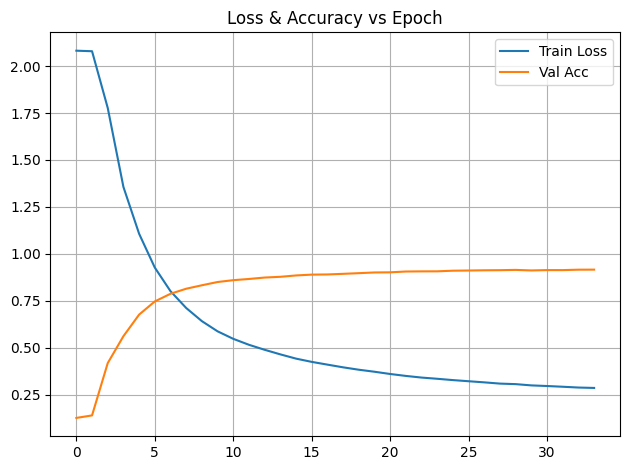

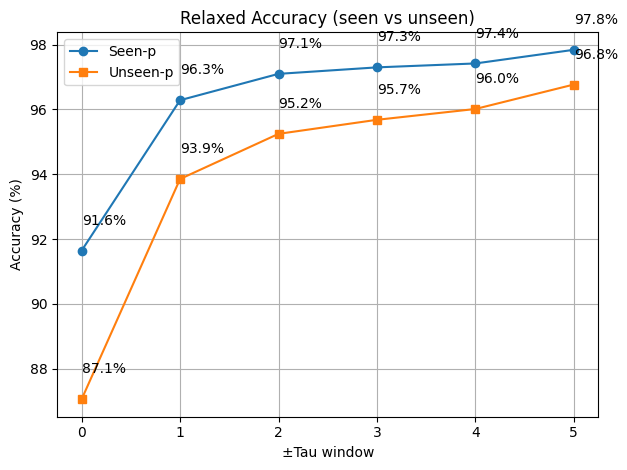

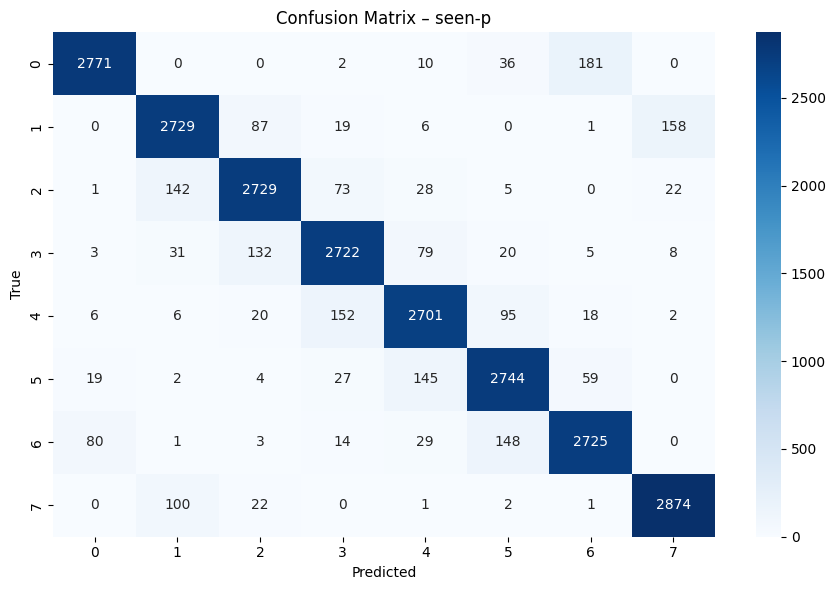

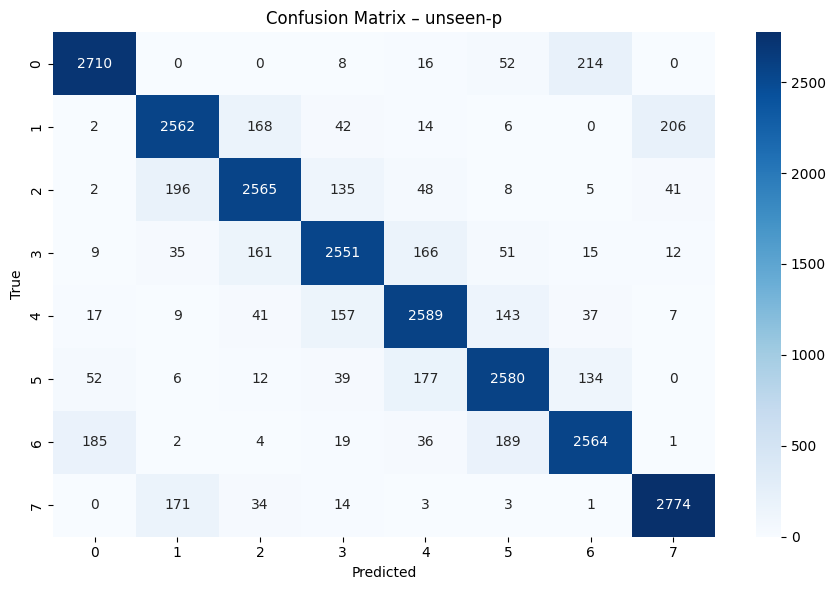

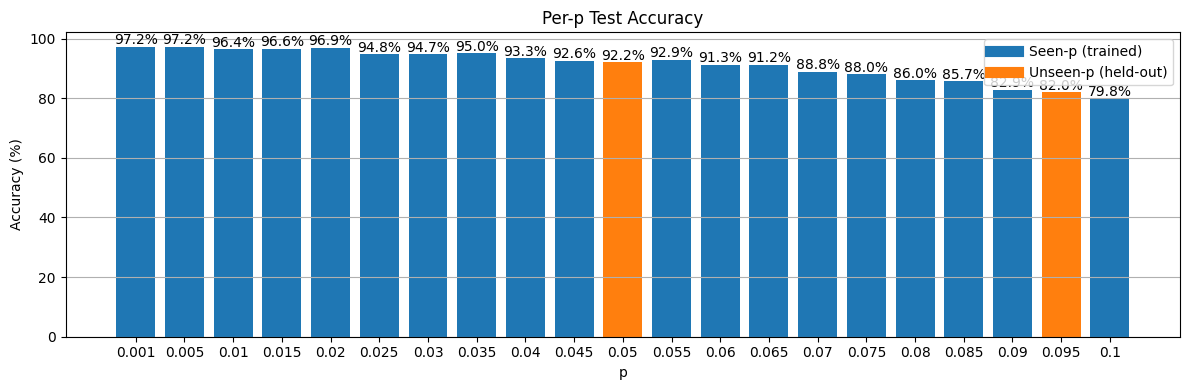


Per-p Accuracies (%):
  p=0.001    97.23   (seen )
  p=0.005    97.23   (seen )
  p=0.01     96.36   (seen )
  p=0.015    96.60   (seen )
  p=0.02     96.91   (seen )
  p=0.025    94.77   (seen )
  p=0.03     94.70   (seen )
  p=0.035    95.01   (seen )
  p=0.04     93.35   (seen )
  p=0.045    92.56   (seen )
  p=0.05     92.15   (UNSEEN)
  p=0.055    92.87   (seen )
  p=0.06     91.29   (seen )
  p=0.065    91.21   (seen )
  p=0.07     88.84   (seen )
  p=0.075    87.97   (seen )
  p=0.08     85.99   (seen )
  p=0.085    85.67   (seen )
  p=0.09     82.90   (seen )
  p=0.095    81.97   (UNSEEN)
  p=0.1      79.81   (seen )


In [23]:
# ---------------- Config -----------------
SEED = 0
T = 5
NUM_CLASSES = T + 1
SAMPLES_PER_CLASS_TRAIN = 30000
SAMPLES_PER_CLASS_VAL   = int(0.10 * SAMPLES_PER_CLASS_TRAIN)
SAMPLES_PER_CLASS_TEST  = int(0.10 * SAMPLES_PER_CLASS_TRAIN)  # per split
BATCH_SIZE = 64
PATIENCE = 5
VAL_DELTA = 0.002
LEARNING_RATE = 1e-4
MAX_EPOCHS = 50

# where your many-ps csvs live:
DATA_DIR = "/kaggle/input/cl31-3lakh-per-p-type2-nn-dataset/out_tpye_two_31"

# -------------- Reproducibility ----------
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# -------- Load all CSVs by (p, C) --------
# expect filenames like: bsc_p0.01_C1_n15_k11.csv  or  bsc_p0.07_C2_n15_k7.csv
rx = re.compile(r"bsc_p([0-9.]+)_C([12])_n31_k(11|6)\.csv$")
data = {}   # key: (p_float, "C1"/"C2") -> np.ndarray [n_codewords, FEATURE_SIZE]

for fn in os.listdir(DATA_DIR):
    m = rx.match(fn)
    if not m:
        continue
    p_val = float(m.group(1))
    C = "C" + m.group(2)
    arr = pd.read_csv(os.path.join(DATA_DIR, fn)).values
    data[(p_val, C)] = arr

# keep only p that have BOTH C1 and C2
ps_have_both = sorted({p for (p, C) in data.keys() if (p, "C1") in data and (p, "C2") in data})
assert len(ps_have_both) >= 4, "Need at least 4 different p to hold out 2 and still have variety."

# infer feature size
FEATURE_SIZE = next(iter(data.values())).shape[1]

# ---- choose two p values to hold out entirely ----
random.shuffle(ps_have_both)
HELDOUT_PS = sorted(ps_have_both[:2])           # unseen at train time
TRAIN_PS   = sorted(ps_have_both[2:])           # used for train/val
print("Held-out p values (UNSEEN in training):", HELDOUT_PS)
print("Seen p values (used for training):    ", TRAIN_PS)

print("Unique p values found:", ps_have_both)
print("Total unique p values:", len(ps_have_both))


# ------------- Data generator -------------
def _cycle(lst):
    while True:
        for x in lst:
            yield x

def generate_data_cpd_multi_ps(N_per_class, T, ps_pool, data_dict, balance=True):
    """
    Build sequences with same p across the whole sequence.
    For class 0 -> All-C1 (T from C1_p), class T -> All-C2 (T from C2_p),
    For class tau in 1..T-1 -> tau from C1_p then (T-tau) from C2_p, all at same p.
    If balance=True, allocate ~equal number of samples per p for each class.
    """
    X, y, p_of_sample = [], [], []
    ps_list = list(ps_pool)
    if balance:
        per_p = math.ceil(N_per_class / len(ps_list))
    g = _cycle(ps_list)

    for cls in range(NUM_CLASSES):
        made = 0
        while made < N_per_class:
            p = next(g)
            # draw indices
            C1_arr = data_dict[(p, "C1")]
            C2_arr = data_dict[(p, "C2")]
            if cls == 0:
                idx = np.random.choice(len(C1_arr), T, replace=True)
                sample = C1_arr[idx]
            elif cls == T:
                idx = np.random.choice(len(C2_arr), T, replace=True)
                sample = C2_arr[idx]
            else:
                tau = cls
                idx1 = np.random.choice(len(C1_arr), tau, replace=True)
                idx2 = np.random.choice(len(C2_arr), T - tau, replace=True)
                sample = np.vstack([C1_arr[idx1], C2_arr[idx2]])
            X.append(sample)
            y.append(cls)
            p_of_sample.append(p)
            made += 1
    return np.array(X), np.array(y), np.array(p_of_sample)

# ------------- Build splits ----------------
# train/val from TRAIN_PS, tests built separately
X_train, y_train, p_train = generate_data_cpd_multi_ps(SAMPLES_PER_CLASS_TRAIN, T, TRAIN_PS, data, balance=True)
X_val,   y_val,   p_val   = generate_data_cpd_multi_ps(SAMPLES_PER_CLASS_VAL,   T, TRAIN_PS, data, balance=True)

# test on seen-p and unseen-p separately
X_test_seen,   y_test_seen,   p_test_seen   = generate_data_cpd_multi_ps(SAMPLES_PER_CLASS_TEST, T, TRAIN_PS,   data, balance=True)
X_test_unseen, y_test_unseen, p_test_unseen = generate_data_cpd_multi_ps(SAMPLES_PER_CLASS_TEST, T, HELDOUT_PS, data, balance=True)


# >>> Insert the dataset size checks & bar plot here <<<
print("Training samples:", len(y_train))
print("Validation samples:", len(y_val))
print("Test (seen-p) samples:", len(y_test_seen))
print("Test (unseen-p) samples:", len(y_test_unseen))

plt.figure(figsize=(8, 4))
sns.countplot(x=y_train, palette="tab10")
plt.title("Training Label Distribution (τ values)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(
    ticks=np.arange(NUM_CLASSES),
    labels=["All-C1"] + [f"CP@{i}" for i in range(1, T)] + ["All-C2"]
)
plt.grid(True)
plt.tight_layout()
plt.show()


# ---------- Build per-p views from the ACTUAL test sets ----------
def per_p_views(X, y, p_arr):
    views = {}
    for p in sorted(np.unique(p_arr)):
        mask = (p_arr == p)
        views[p] = (X[mask], y[mask])
    return views

per_p_tests_seen   = per_p_views(X_test_seen,   y_test_seen,   p_test_seen)
per_p_tests_unseen = per_p_views(X_test_unseen, y_test_unseen, p_test_unseen)

# merge seen + unseen so we can print a single table later
per_p_tests_all = {**per_p_tests_seen, **per_p_tests_unseen}

# --------- Dataset & Loaders --------------
class ChangepointDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self): return len(self.X)
    def __getitem__(self, i): return self.X[i], self.y[i]

train_loader = DataLoader(ChangepointDataset(X_train, y_train), batch_size=BATCH_SIZE, shuffle=True)
val_loader   = DataLoader(ChangepointDataset(X_val,   y_val),   batch_size=BATCH_SIZE)
test_seen_loader   = DataLoader(ChangepointDataset(X_test_seen,   y_test_seen),   batch_size=BATCH_SIZE)
test_unseen_loader = DataLoader(ChangepointDataset(X_test_unseen, y_test_unseen), batch_size=BATCH_SIZE)

# --------------- Model --------------------
class ResidualBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, dropout=0.3):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size, padding=kernel_size//2)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size, padding=kernel_size//2)
        self.bn2 = nn.BatchNorm1d(out_channels)
        self.dropout = nn.Dropout(dropout)
        self.shortcut = nn.Conv1d(in_channels, out_channels, 1) if in_channels!=out_channels else nn.Identity()
        self.bn_sc = nn.BatchNorm1d(out_channels)
    def forward(self, x):
        identity = self.bn_sc(self.shortcut(x))
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.dropout(x)
        x = self.bn2(self.conv2(x))
        return F.relu(x + identity)

class MultiscaleFeatureExtractor(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.branch1 = nn.Conv1d(in_channels, out_channels, 3, padding=1)
        self.branch2 = nn.Conv1d(in_channels, out_channels, 5, padding=2)
        self.branch3 = nn.Conv1d(in_channels, out_channels, 7, padding=3)
        self.bn = nn.BatchNorm1d(out_channels*3)
    def forward(self, x):
        x1 = self.branch1(x); x2 = self.branch2(x); x3 = self.branch3(x)
        return F.relu(self.bn(torch.cat([x1,x2,x3], dim=1)))

class CNNChangepointDetector(nn.Module):
    def __init__(self, input_channels, num_classes, input_length):
        super().__init__()
        self.mfe = MultiscaleFeatureExtractor(input_channels, 32)  # -> 96 ch
        if input_length <= 15:
            self.res_blocks = nn.Sequential(ResidualBlock1D(96,96), ResidualBlock1D(96,128))
        else:
            self.res_blocks = nn.Sequential(ResidualBlock1D(96,96), ResidualBlock1D(96,96),
                                            ResidualBlock1D(96,128), ResidualBlock1D(128,128))
        self.pool = nn.AdaptiveAvgPool1d(1)
        self.classifier = nn.Sequential(nn.Flatten(),
                                        nn.Linear(128,128), nn.ReLU(), nn.Dropout(0.5),
                                        nn.Linear(128,num_classes))
    def forward(self, x):
        x = x.permute(0,2,1)            # [B,T,F] -> [B,F,T]
        x = self.mfe(x)
        x = self.res_blocks(x)
        x = self.pool(x)
        return self.classifier(x)

# -------------- Train ---------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNChangepointDetector(FEATURE_SIZE, NUM_CLASSES, T).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=3)

best_val_acc, epochs_no_improve = 0.0, 0
train_losses, val_accuracies = [], []

for epoch in trange(MAX_EPOCHS, desc="Training"):
    model.train()
    running = 0.0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()
        running += loss.item()
    train_loss = running / len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    correct = total = 0
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            preds = model(xb).argmax(1)
            correct += (preds == yb).sum().item()
            total += yb.size(0)
    val_acc = correct / total
    val_accuracies.append(val_acc)
    scheduler.step(val_acc)
    print(f"Epoch {epoch+1:02d} | TrainLoss {train_loss:.4f} | ValAcc {val_acc:.4f}")

    if val_acc - best_val_acc > VAL_DELTA:
        best_val_acc = val_acc
        best_state = {k:v.cpu() for k,v in model.state_dict().items()}
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= PATIENCE:
            print("Early stopping.")
            break

# -------------- Evaluation helpers --------
def eval_loader(loader):
    model.eval()
    ys, yhats = [], []
    with torch.no_grad():
        for xb, yb in loader:
            xb = xb.to(device)
            pred = model(xb).argmax(1).cpu().numpy()
            ys.extend(yb.numpy()); yhats.extend(pred)
    ys = np.array(ys); yhats = np.array(yhats)
    return ys, yhats

def relaxed_accuracy(y_true, y_pred, window):
    return np.mean(np.abs(y_true - y_pred) <= window)

# restore best
model.load_state_dict({k: v.to(device) for k,v in best_state.items()})

# overall seen/unseen
y_seen,  yhat_seen  = eval_loader(test_seen_loader)
y_un,    yhat_un    = eval_loader(test_unseen_loader)

acc_seen   = accuracy_score(y_seen, yhat_seen)
acc_unseen = accuracy_score(y_un,   yhat_un)
print(f"\nTest Accuracy (seen-p):   {acc_seen:.4f}")
print(f"Test Accuracy (unseen-p): {acc_unseen:.4f}")

# ---------- Overall combined accuracy ----------
total_correct = (y_seen == yhat_seen).sum() + (y_un == yhat_un).sum()
total_samples = len(y_seen) + len(y_un)
overall_acc   = total_correct / total_samples
print(f"Overall Test Accuracy (seen+unseen): {overall_acc:.4f}")

# per-p accuracies
per_p_acc = {}
for p, (Xp, yp) in per_p_tests_all.items():
    dl = DataLoader(ChangepointDataset(Xp, yp), batch_size=BATCH_SIZE)
    yt, yhat = eval_loader(dl)
    per_p_acc[p] = accuracy_score(yt, yhat)

# -------------- Plots ---------------------
# training curves
plt.figure(); plt.plot(train_losses, label="Train Loss"); plt.plot(val_accuracies, label="Val Acc")
plt.title("Loss & Accuracy vs Epoch"); plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

# relaxed accuracy curves
wins = list(range(6))
rel_seen   = [relaxed_accuracy(y_seen, yhat_seen, w)*100   for w in wins]
rel_unseen = [relaxed_accuracy(y_un,   yhat_un,   w)*100   for w in wins]
plt.figure(); plt.plot(wins, rel_seen,  marker='o', label='Seen-p')
plt.plot(wins, rel_unseen, marker='s', label='Unseen-p')
for x,y in zip(wins, rel_seen):  plt.text(x, y+0.8,  f"{y:.1f}%")
for x,y in zip(wins, rel_unseen):plt.text(x, y+0.8,  f"{y:.1f}%")
plt.xlabel("±Tau window"); plt.ylabel("Accuracy (%)"); plt.title("Relaxed Accuracy (seen vs unseen)"); plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

# confusion matrices
def show_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=np.arange(NUM_CLASSES))
    plt.figure(figsize=(9,6)); sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title); plt.xlabel("Predicted"); plt.ylabel("True"); plt.tight_layout(); plt.show()
show_cm(y_seen, yhat_seen,  "Confusion Matrix – seen-p")
show_cm(y_un,   yhat_un,    "Confusion Matrix – unseen-p")

# per-p bar chart
ps_sorted = sorted(per_p_acc.keys())
vals = [per_p_acc[p]*100 for p in ps_sorted]
colors = ["tab:blue" if p in TRAIN_PS else "tab:orange" for p in ps_sorted]
plt.figure(figsize=(12,4))
plt.bar([str(p) for p in ps_sorted], vals, color=colors)
for i,v in enumerate(vals): plt.text(i, v+0.8, f"{v:.1f}%", ha='center')
plt.title("Per-p Test Accuracy"); plt.xlabel("p"); plt.ylabel("Accuracy (%)")
legend_patches = [plt.Line2D([0],[0], color='tab:blue', lw=8, label='Seen-p (trained)'),
                  plt.Line2D([0],[0], color='tab:orange', lw=8, label='Unseen-p (held-out)')]
plt.legend(handles=legend_patches); plt.grid(True, axis='y'); plt.tight_layout(); plt.show()

# also print a small table
print("\nPer-p Accuracies (%):")
for p in ps_sorted:
    tag = "seen " if p in TRAIN_PS else "UNSEEN"
    print(f"  p={p:<6}  {per_p_acc[p]*100:6.2f}   ({tag})")

In [25]:
# ====================== Imports ======================
import os, re, math, random, copy, json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import trange

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix, accuracy_score

# ---------------- Config -----------------
SEED = 0
T = 5
NUM_CLASSES = T + 1
SAMPLES_PER_CLASS_TRAIN = 80000
SAMPLES_PER_CLASS_VAL   = int(0.10 * SAMPLES_PER_CLASS_TRAIN)
SAMPLES_PER_CLASS_TEST  = int(0.10 * SAMPLES_PER_CLASS_TRAIN)  # per split
BATCH_SIZE = 64
PATIENCE = 5
VAL_DELTA = 0.002
LEARNING_RATE = 1e-4
MAX_EPOCHS = 50

# where your many-ps csvs live:
DATA_DIR = "/kaggle/input/cl31-3lakh-per-p-type2-nn-dataset/out_tpye_two_31"
OUTPUT_DIR = "/kaggle/working"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# -------------- Reproducibility ----------
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# -------- Load all CSVs by (p, C) --------
rx = re.compile(r"bsc_p([0-9.]+)_C([12])_n31_k(11|6)\.csv$")
data = {}   # key: (p_float, "C1"/"C2") -> np.ndarray [n_codewords, FEATURE_SIZE]

for fn in os.listdir(DATA_DIR):
    m = rx.match(fn)
    if not m:
        continue
    p_val = float(m.group(1))
    C = "C" + m.group(2)
    arr = pd.read_csv(os.path.join(DATA_DIR, fn)).values
    data[(p_val, C)] = arr

ps_have_both = sorted({p for (p, C) in data.keys() if (p, "C1") in data and (p, "C2") in data})
assert len(ps_have_both) >= 4, "Need at least 4 different p to hold out 2 and still have variety."

FEATURE_SIZE = next(iter(data.values())).shape[1]

random.shuffle(ps_have_both)
HELDOUT_PS = sorted(ps_have_both[:2])           # unseen at train time
TRAIN_PS   = sorted(ps_have_both[2:])           # used for train/val
print("Held-out p values (UNSEEN in training):", HELDOUT_PS)
print("Seen p values (used for training):    ", TRAIN_PS)

# ------------- Data generator -------------
def _cycle(lst):
    while True:
        for x in lst:
            yield x

def generate_data_cpd_multi_ps(N_per_class, T, ps_pool, data_dict, balance=True):
    X, y, p_of_sample = [], [], []
    ps_list = list(ps_pool)
    if balance:
        per_p = math.ceil(N_per_class / len(ps_list))
    g = _cycle(ps_list)
    for cls in range(NUM_CLASSES):
        made = 0
        while made < N_per_class:
            p = next(g)
            C1_arr = data_dict[(p, "C1")]
            C2_arr = data_dict[(p, "C2")]
            if cls == 0:
                idx = np.random.choice(len(C1_arr), T, replace=True)
                sample = C1_arr[idx]
            elif cls == T:
                idx = np.random.choice(len(C2_arr), T, replace=True)
                sample = C2_arr[idx]
            else:
                tau = cls
                idx1 = np.random.choice(len(C1_arr), tau, replace=True)
                idx2 = np.random.choice(len(C2_arr), T - tau, replace=True)
                sample = np.vstack([C1_arr[idx1], C2_arr[idx2]])
            X.append(sample); y.append(cls); p_of_sample.append(p); made += 1
    return np.array(X), np.array(y), np.array(p_of_sample)

# ------------- Build splits ----------------
X_train, y_train, p_train = generate_data_cpd_multi_ps(SAMPLES_PER_CLASS_TRAIN, T, TRAIN_PS, data, balance=True)
X_val,   y_val,   p_val   = generate_data_cpd_multi_ps(SAMPLES_PER_CLASS_VAL,   T, TRAIN_PS, data, balance=True)
X_test_seen,   y_test_seen,   p_test_seen   = generate_data_cpd_multi_ps(SAMPLES_PER_CLASS_TEST, T, TRAIN_PS,   data, balance=True)
X_test_unseen, y_test_unseen, p_test_unseen = generate_data_cpd_multi_ps(SAMPLES_PER_CLASS_TEST, T, HELDOUT_PS, data, balance=True)

print("Training samples:", len(y_train))
print("Validation samples:", len(y_val))
print("Test (seen-p) samples:", len(y_test_seen))
print("Test (unseen-p) samples:", len(y_test_unseen))

plt.figure(figsize=(8, 4))
sns.countplot(x=y_train, palette="tab10")
plt.title("Training Label Distribution (τ values)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(ticks=np.arange(NUM_CLASSES),
           labels=["All-C1"] + [f"CP@{i}" for i in range(1, T)] + ["All-C2"])
plt.grid(True); plt.tight_layout(); plt.show()

# ---------- Build per-p views ----------
def per_p_views(X, y, p_arr):
    views = {}
    for p in sorted(np.unique(p_arr)):
        mask = (p_arr == p)
        views[p] = (X[mask], y[mask])
    return views

per_p_tests_seen   = per_p_views(X_test_seen,   y_test_seen,   p_test_seen)
per_p_tests_unseen = per_p_views(X_test_unseen, y_test_unseen, p_test_unseen)
per_p_tests_all = {**per_p_tests_seen, **per_p_tests_unseen}

# --------- Dataset & Loaders --------------
class ChangepointDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self): return len(self.X)
    def __getitem__(self, i): return self.X[i], self.y[i]

train_loader = DataLoader(ChangepointDataset(X_train, y_train), batch_size=BATCH_SIZE, shuffle=True)
val_loader   = DataLoader(ChangepointDataset(X_val,   y_val),   batch_size=BATCH_SIZE)
test_seen_loader   = DataLoader(ChangepointDataset(X_test_seen,   y_test_seen),   batch_size=BATCH_SIZE)
test_unseen_loader = DataLoader(ChangepointDataset(X_test_unseen, y_test_unseen), batch_size=BATCH_SIZE)

# --------------- Model --------------------
class ResidualBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, dropout=0.3):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size, padding=kernel_size//2)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size, padding=kernel_size//2)
        self.bn2 = nn.BatchNorm1d(out_channels)
        self.dropout = nn.Dropout(dropout)
        self.shortcut = nn.Conv1d(in_channels, out_channels, 1) if in_channels!=out_channels else nn.Identity()
        self.bn_sc = nn.BatchNorm1d(out_channels)
    def forward(self, x):
        identity = self.bn_sc(self.shortcut(x))
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.dropout(x)
        x = self.bn2(self.conv2(x))
        return F.relu(x + identity)

class MultiscaleFeatureExtractor(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.branch1 = nn.Conv1d(in_channels, out_channels, 3, padding=1)
        self.branch2 = nn.Conv1d(in_channels, out_channels, 5, padding=2)
        self.branch3 = nn.Conv1d(in_channels, out_channels, 7, padding=3)
        self.bn = nn.BatchNorm1d(out_channels*3)
    def forward(self, x):
        x1 = self.branch1(x); x2 = self.branch2(x); x3 = self.branch3(x)
        return F.relu(self.bn(torch.cat([x1,x2,x3], dim=1)))

class CNNChangepointDetector(nn.Module):
    def __init__(self, input_channels, num_classes, input_length):
        super().__init__()
        self.mfe = MultiscaleFeatureExtractor(input_channels, 32)  # -> 96 ch
        if input_length <= 15:
            self.res_blocks = nn.Sequential(ResidualBlock1D(96,96), ResidualBlock1D(96,128))
        else:
            self.res_blocks = nn.Sequential(ResidualBlock1D(96,96), ResidualBlock1D(96,96),
                                            ResidualBlock1D(96,128), ResidualBlock1D(128,128))
        self.pool = nn.AdaptiveAvgPool1d(1)
        self.classifier = nn.Sequential(nn.Flatten(),
                                        nn.Linear(128,128), nn.ReLU(), nn.Dropout(0.5),
                                        nn.Linear(128,num_classes))
    def forward(self, x):
        x = x.permute(0,2,1)  # [B,T,F] -> [B,F,T]
        x = self.mfe(x); x = self.res_blocks(x); x = self.pool(x)
        return self.classifier(x)

# -------------- Train ---------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNChangepointDetector(FEATURE_SIZE, NUM_CLASSES, T).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=3)

best_val_acc, epochs_no_improve = 0.0, 0
train_losses, val_accuracies = [], []

for epoch in trange(MAX_EPOCHS, desc="Training"):
    model.train(); running = 0.0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward(); optimizer.step()
        running += loss.item()
    train_loss = running / len(train_loader)
    train_losses.append(train_loss)

    model.eval(); correct = total = 0
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            preds = model(xb).argmax(1)
            correct += (preds == yb).sum().item(); total += yb.size(0)
    val_acc = correct / total
    val_accuracies.append(val_acc); scheduler.step(val_acc)
    print(f"Epoch {epoch+1:02d} | TrainLoss {train_loss:.4f} | ValAcc {val_acc:.4f}")

    if val_acc - best_val_acc > VAL_DELTA:
        best_val_acc = val_acc
        best_state = {k:v.cpu() for k,v in model.state_dict().items()}
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= PATIENCE:
            print("Early stopping."); break

# -------------- Evaluation ----------------
def eval_loader(loader):
    model.eval(); ys, yhats = [], []
    with torch.no_grad():
        for xb, yb in loader:
            xb = xb.to(device)
            pred = model(xb).argmax(1).cpu().numpy()
            ys.extend(yb.numpy()); yhats.extend(pred)
    return np.array(ys), np.array(yhats)

def relaxed_accuracy(y_true, y_pred, window):
    return np.mean(np.abs(y_true - y_pred) <= window)

model.load_state_dict({k: v.to(device) for k,v in best_state.items()})

y_seen, yhat_seen = eval_loader(test_seen_loader)
y_un,   yhat_un   = eval_loader(test_unseen_loader)

acc_seen, acc_unseen = accuracy_score(y_seen, yhat_seen), accuracy_score(y_un, yhat_un)
print(f"\nTest Accuracy (seen-p):   {acc_seen:.4f}")
print(f"Test Accuracy (unseen-p): {acc_unseen:.4f}")

overall_acc = ((y_seen==yhat_seen).sum() + (y_un==yhat_un).sum()) / (len(y_seen)+len(y_un))
print(f"Overall Test Accuracy (seen+unseen): {overall_acc:.4f}")

# per-p accuracies
per_p_acc = {}
for p, (Xp, yp) in per_p_tests_all.items():
    dl = DataLoader(ChangepointDataset(Xp, yp), batch_size=BATCH_SIZE)
    yt, yhat = eval_loader(dl)
    per_p_acc[p] = accuracy_score(yt, yhat)

# ---------------- Plots -------------------
plt.figure(); plt.plot(train_losses, label="Train Loss"); plt.plot(val_accuracies, label="Val Acc")
plt.title("Loss & Accuracy vs Epoch"); plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

wins = list(range(6))
rel_seen   = [relaxed_accuracy(y_seen, yhat_seen, w)*100   for w in wins]
rel_unseen = [relaxed_accuracy(y_un,   yhat_un,   w)*100   for w in wins]
plt.figure(); plt.plot(wins, rel_seen, marker='o', label='Seen-p')
plt.plot(wins, rel_unseen, marker='s', label='Unseen-p')
plt.xlabel("±Tau window"); plt.ylabel("Accuracy (%)"); plt.title("Relaxed Accuracy (seen vs unseen)")
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

cm = confusion_matrix(y_seen, yhat_seen, labels=np.arange(NUM_CLASSES))
plt.figure(figsize=(9,6)); sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix – seen-p"); plt.xlabel("Predicted"); plt.ylabel("True"); plt.tight_layout(); plt.show()

cm = confusion_matrix(y_un, yhat_un, labels=np.arange(NUM_CLASSES))
plt.figure(figsize=(9,6)); sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix – unseen-p"); plt.xlabel("Predicted"); plt.ylabel("True"); plt.tight_layout(); plt.show()

ps_sorted = sorted(per_p_acc.keys()); vals = [per_p_acc[p]*100 for p in ps_sorted]
colors = ["tab:blue" if p in TRAIN_PS else "tab:orange" for p in ps_sorted]
plt.figure(figsize=(12,4)); plt.bar([str(p) for p in ps_sorted], vals, color=colors)
for i,v in enumerate(vals): plt.text(i, v+0.8, f"{v:.1f}%", ha='center')
plt.title("Per-p Test Accuracy"); plt.xlabel("p"); plt.ylabel("Accuracy (%)")
plt.legend(handles=[plt.Line2D([0],[0], color='tab:blue', lw=8, label='Seen-p'),
                    plt.Line2D([0],[0], color='tab:orange', lw=8, label='Unseen-p')])
plt.grid(True, axis='y'); plt.tight_layout(); plt.show()

print("\nPer-p Accuracies (%):")
for p in ps_sorted:
    tag = "seen " if p in TRAIN_PS else "UNSEEN"
    print(f"  p={p:<6}  {per_p_acc[p]*100:6.2f}   ({tag})")

# =============== Save Artifacts ===============
TS_PATH    = os.path.join(OUTPUT_DIR, f"cpd_windowT{T}_n{FEATURE_SIZE}_model.pt")
STATE_PATH = os.path.join(OUTPUT_DIR, f"cpd_windowT{T}_n{FEATURE_SIZE}_state.pth")
FULL_PATH  = os.path.join(OUTPUT_DIR, f"cpd_windowT{T}_n{FEATURE_SIZE}_full.pth")
META_PATH  = os.path.join(OUTPUT_DIR, f"cpd_windowT{T}_n{FEATURE_SIZE}_meta.json")

torch.save(best_state, STATE_PATH)
torch.save(model, FULL_PATH)

model_cpu = copy.deepcopy(model).to("cpu").eval()
try:
    scripted = torch.jit.script(model_cpu)
except Exception:
    example = torch.randn(1, T, FEATURE_SIZE)
    scripted = torch.jit.trace(model_cpu, example)
scripted.save(TS_PATH)

with open(META_PATH, "w") as f:
    json.dump({
        "T": int(T), "n": int(FEATURE_SIZE), "num_classes": int(NUM_CLASSES),
        "train_ps": TRAIN_PS, "heldout_ps": HELDOUT_PS,
        "best_val_acc": float(best_val_acc),
        "test_acc_seen": float(acc_seen),
        "test_acc_unseen": float(acc_unseen),
        "overall_acc": float(overall_acc)
    }, f, indent=2)

print("\nSaved artifacts:")
print("  state_dict ->", STATE_PATH)
print("  full model ->", FULL_PATH)
print("  TorchScript ->", TS_PATH)
print("  metadata ->", META_PATH)



Zip written to both locations:
 - Outputs (persists with run): /kaggle/outputs/Type2_NN_cl_15_T7_Results.zip
 - Working (Files sidebar):      /kaggle/working/Type2_NN_cl_15_T7_Results.zip

How to download:
  • In right sidebar, open *Files* → /kaggle/working → click the download arrow on Type2_NN_cl_15_T7_Results.zip
  • Or open *Output* tab (top-right), the zip will be listed there as well.

If Output tab glitches, the /kaggle/working copy is the most reliable to download.

Current zips in outputs: ['/kaggle/outputs/Type2_NN_cl_15_T7_Results.zip']
Current zips in working: ['/kaggle/working/Type2_NN_cl_15_T7_Results.zip']
